In [1]:
import re

# Charger le fichier
with open("log_text.txt", "r", encoding="utf-8") as f:
    log_file = f.read()

# Définir la regex
pattern = re.compile(r"Count\s+(\d+)\s+ext_offset\s+(\d+)\s+Width\s+([\d.]+)\s+Offset\s+(-?[\d.]+)")

# Appliquer la regex
matches = pattern.findall(log_file)

# Afficher les résultats
for count, ext_offset, width, offset in matches:
    print(f"Count: {count}, ext_offset: {ext_offset}, Width: {width}, Offset: {offset}")



Count: 01, ext_offset: 01, Width: 38.00, Offset: -40.00
Count: 01, ext_offset: 01, Width: 37.40, Offset: -39.60
Count: 01, ext_offset: 01, Width: 37.60, Offset: -38.40
Count: 01, ext_offset: 01, Width: 37.00, Offset: -38.00
Count: 01, ext_offset: 01, Width: 37.60, Offset: -37.60
Count: 01, ext_offset: 01, Width: 37.40, Offset: -37.40
Count: 01, ext_offset: 01, Width: 38.40, Offset: -37.40
Count: 01, ext_offset: 01, Width: 38.80, Offset: -37.20
Count: 02, ext_offset: 01, Width: 37.80, Offset: -37.00
Count: 01, ext_offset: 01, Width: 37.00, Offset: -36.60
Count: 01, ext_offset: 01, Width: 38.80, Offset: -36.60
Count: 01, ext_offset: 01, Width: 37.60, Offset: -36.40
Count: 01, ext_offset: 01, Width: 38.00, Offset: -36.40
Count: 01, ext_offset: 01, Width: 38.00, Offset: -36.20
Count: 01, ext_offset: 01, Width: 37.60, Offset: -35.80
Count: 01, ext_offset: 01, Width: 37.40, Offset: -35.60
Count: 01, ext_offset: 01, Width: 37.60, Offset: -35.40
Count: 01, ext_offset: 01, Width: 37.80, Offset:

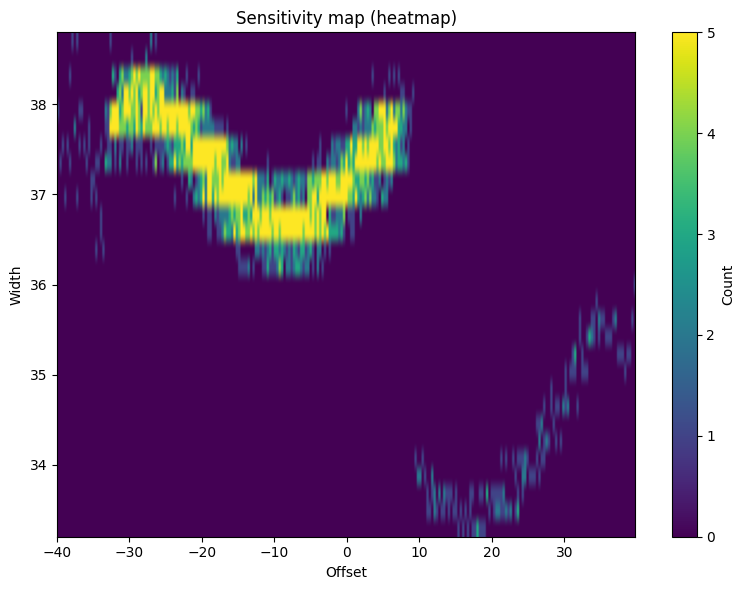

In [4]:
import re
import numpy as np
import matplotlib.pyplot as plt

LOG = "log_text.txt"           # adapte si ton fichier est ailleurs

# ----------- 1) extraire (width, offset, count) à chaque en-tête -----------
meta = re.compile(
    r"Count\s+(\d+)\s+ext_offset\s+\d+\s+Width\s+([\d.]+)\s+Offset\s+(-?[\d.]+)"
)

records = []
with open(LOG, encoding="utf-8") as f:
    for line in f:
        m = meta.match(line)
        if m:
            count  = int(m.group(1))
            width  = float(m.group(2))
            offset = float(m.group(3))
            records.append((width, offset, count))

# ----------- 2) construire la grille Width × Offset -----------------------
ws = sorted({w for w, _, _ in records})     # valeurs distinctes de Width
os = sorted({o for _, o, _ in records})     # valeurs distinctes d'Offset

w_index = {w: i for i, w in enumerate(ws)}
o_index = {o: i for i, o in enumerate(os)}

heat = np.zeros((len(ws), len(os)), dtype=int)
for w, o, c in records:
    heat[w_index[w], o_index[o]] += c       # cumule les Counts éventuels

# ----------- 3) affichage --------------------------------------------------
plt.figure(figsize=(8, 6))
plt.imshow(
    heat,
    origin="lower",                        # 34 → bas, 38 → haut
    aspect="auto",
    extent=[min(os), max(os), min(ws), max(ws)]
)
plt.colorbar(label="Count")
plt.xlabel("Offset")
plt.ylabel("Width")
plt.title("Sensitivity map (heatmap)")
plt.tight_layout()
plt.show()


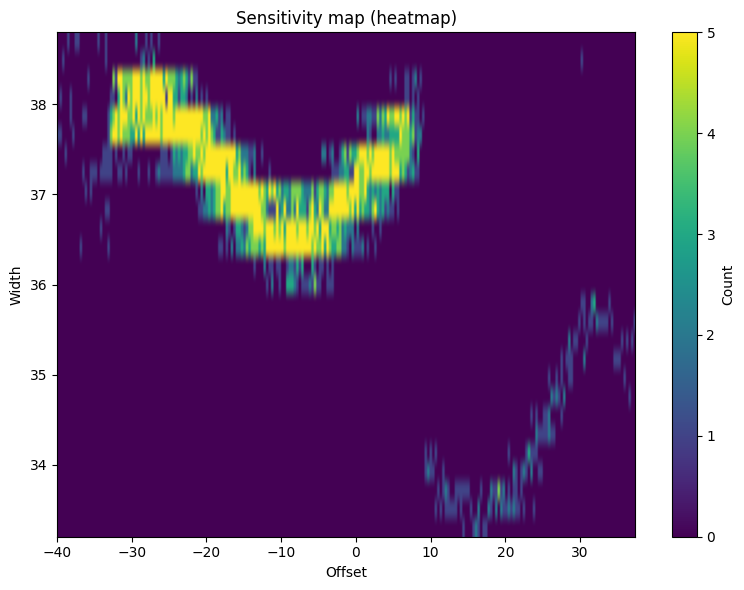

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

LOG2 = "log_text2.txt"           # adapte si ton fichier est ailleurs

# ----------- 1) extraire (width, offset, count) à chaque en-tête -----------
meta = re.compile(
    r"Count\s+(\d+)\s+ext_offset\s+\d+\s+Width\s+([\d.]+)\s+Offset\s+(-?[\d.]+)"
)

records = []
with open(LOG2, encoding="utf-8") as f:
    for line in f:
        m = meta.match(line)
        if m:
            count  = int(m.group(1))
            width  = float(m.group(2))
            offset = float(m.group(3))
            records.append((width, offset, count))

# ----------- 2) construire la grille Width × Offset -----------------------
ws = sorted({w for w, _, _ in records})     # valeurs distinctes de Width
os = sorted({o for _, o, _ in records})     # valeurs distinctes d'Offset

w_index = {w: i for i, w in enumerate(ws)}
o_index = {o: i for i, o in enumerate(os)}

heat = np.zeros((len(ws), len(os)), dtype=int)
for w, o, c in records:
    heat[w_index[w], o_index[o]] += c       # cumule les Counts éventuels

# ----------- 3) affichage --------------------------------------------------
plt.figure(figsize=(8, 6))
plt.imshow(
    heat,
    origin="lower",                        # 34 → bas, 38 → haut
    aspect="auto",
    extent=[min(os), max(os), min(ws), max(ws)]
)
plt.colorbar(label="Count")
plt.xlabel("Offset")
plt.ylabel("Width")
plt.title("Sensitivity map (heatmap)")
plt.tight_layout()
plt.show()
